In [134]:
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure


In [135]:

extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'
  
SHORT_HEADERS = ['SNo', 'State/UT','Total Confirmed cases', 
                 'Cured/Discharged/Migrated','Death'] 
  
response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 
  
stats = [] 
all_rows = soup.find_all('tr') 
  
for row in all_rows: 
    stat = extract_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 4: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
        elif len(stat) == 5: 
            stats.append(stat) 
  
stats[-1][1] = "Total Cases"
  
stats.remove(stats[-1])

In [119]:

objects = [] 
for row in stats : 
    objects.append(row[1])  
  
y_pos = np.arange(len(objects)) 
  
performance = [] 
for row in stats : 
    performance.append(int(row[2]) + int(row[3])) 
  
table = tabulate(stats, headers=SHORT_HEADERS) 
print(table)

  SNo  State/UT                       Total Confirmed cases    Cured/Discharged/Migrated    Death
-----  ---------------------------  -----------------------  ---------------------------  -------
    1  Andaman and Nicobar Islands                       33                           15        0
    2  Andhra Pradesh                                  1259                          258       31
    3  Arunachal Pradesh                                  1                            1        0
    4  Assam                                             38                           27        1
    5  Bihar                                            366                           64        2
    6  Chandigarh                                        56                           17        0
    7  Chhattisgarh                                      38                           34        0
    8  Delhi                                           3314                         1078       54
    9  Goa          

<Figure size 720x1440 with 0 Axes>

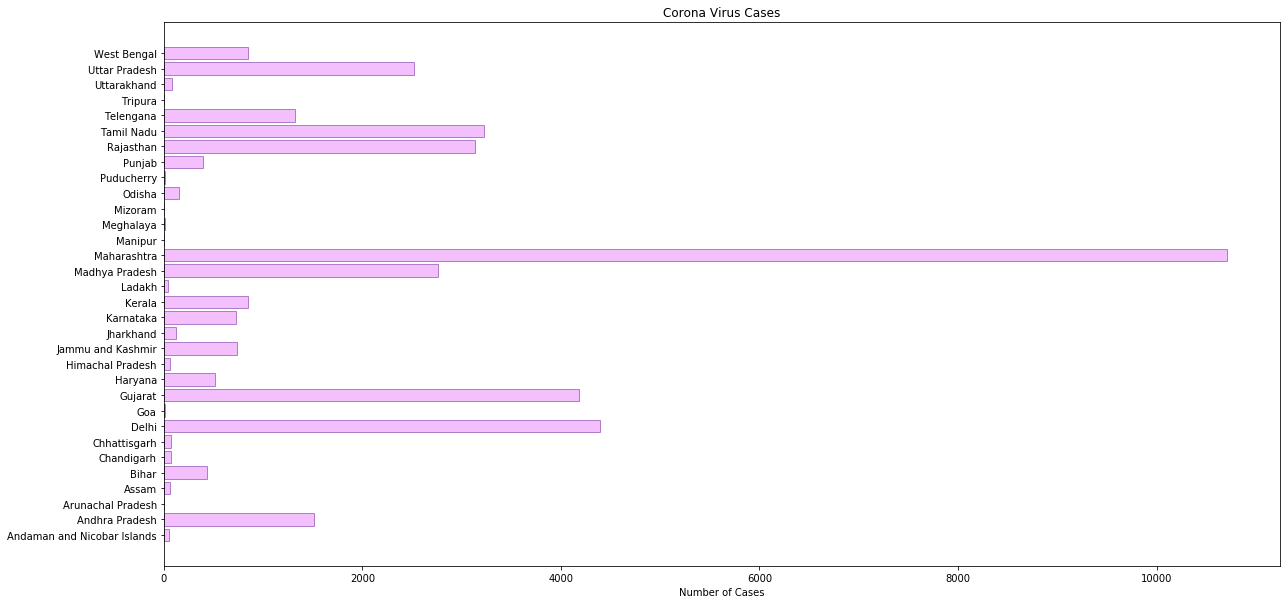

<Figure size 720x1440 with 0 Axes>

In [136]:
plt.barh(y_pos, performance, align='center', alpha=0.5,
                 color=(234/256.0, 128/256.0, 252/256.0), 
                 edgecolor=(106/256.0, 27/256.0, 154/256.0)) 
  
plt.yticks(y_pos, objects) 

plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
figure(num=None, figsize=(10,20))